<a href="https://colab.research.google.com/github/nickarad/Tensorflow/blob/master/handwrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras

In [0]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
    return model

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_train_reshaped = x_train.reshape(-1, 28*28)

x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_test_reshaped = x_test.reshape(-1, 28*28)
# print(y_train)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import warnings
model = create_model()
model.fit(x_train_reshaped, y_train, epochs=3)
warnings.filterwarnings("ignore")

Epoch 1/3
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2630 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1079 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0725 - acc: 0.9774


10000/10000 [==============================] - 1s 51us/sample - loss: 0.0975 - acc: 0.9705
0.09750959283113479
0.9705
prediction: 5
real value: 5


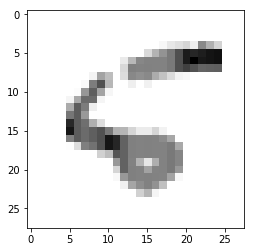

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
val_loss, val_acc = model.evaluate(x_test_reshaped, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy


# -- Make predictions
predictions = model.predict(x_test_reshaped)
print("prediction:", np.argmax(predictions[8]))
print("real value:", y_test[8])

# print(np.argmax(predictions[8]))
plt.imshow(x_test[8], cmap=plt.cm.binary)
plt.show()

model.summary()
# Save entire model
model.save('my_model.h5')